In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.shape

(50000, 10)

### Preprocessing

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
df_x = df.drop(columns = ['price', 'x', 'y', 'z'])
df_y = df['price']

In [7]:
df_x = pd.get_dummies(df_x, columns=['cut', 'color', 'clarity'])

In [8]:
scaler = MinMaxScaler()
df_x = scaler.fit_transform(df_x)

### Model Creation

In [9]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [10]:
x_train, x_temp, y_train, y_temp = train_test_split(df_x, df_y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape = (x_train.shape[1],), activation = 'relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', metrics=['mae'], loss='mse')
model.summary()

d:\Conda\envs\TensorFlow\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,441 (52.50 KB)

 Trainable params: 13,441 (52.50 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
hist = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 19462148.0000 - mae: 3110.1282 - val_loss: 3987930.2500 - val_mae: 1577.3918
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1644494.7500 - mae: 776.9066 - val_loss: 455563.1250 - val_mae: 358.2044
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 522065.0312 - mae: 382.8170 - val_loss: 397899.4375 - val_mae: 340.8139
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 452677.1562 - mae: 358.3322 - val_loss: 416608.6562 - val_mae: 368.8352
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 431032.7500 - mae: 349.0247 - val_loss: 362354.3438 - val_mae: 333.7292
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 398979.5312 - mae: 339.3279 - val_loss: 365409.5625 - val_mae: 326.1306
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 393971.0000 - mae: 336.3651 - val_loss: 329794.8438 - val_mae: 307.0523
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - 

In [13]:
prediction = model.predict(x_test)
actual = np.array(y_test[:20])

for i in range(20):
    print(f"Prediction: {prediction[i]} Actual: {actual[i]}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Prediction: [15718.6875] Actual: 17127
Prediction: [814.0731] Actual: 802
Prediction: [8266.497] Actual: 8067
Prediction: [1499.4534] Actual: 1341
Prediction: [841.6952] Actual: 956
Prediction: [775.75964] Actual: 579
Prediction: [6429.2935] Actual: 6729
Prediction: [1212.1725] Actual: 1220
Prediction: [570.46545] Actual: 547
Prediction: [2341.201] Actual: 2939
Prediction: [746.41223] Actual: 844
Prediction: [2503.1628] Actual: 2323
Prediction: [11046.966] Actual: 12030
Prediction: [1912.854] Actual: 1803
Prediction: [16574.562] Actual: 16955
Prediction: [759.74133] Actual: 928
Prediction: [1988.3184] Actual: 1889
Prediction: [816.13184] Actual: 730
Prediction: [4147.084] Actual: 4666
Prediction: [2668.3765] Actual: 2615


In [14]:
loss, mae = model.evaluate(x_test, y_test)
print(f'Loss = {loss}\nMAE = {mae}')

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 280839.5000 - mae: 307.5164
Loss = 305163.03125
MAE = 314.2101135253906


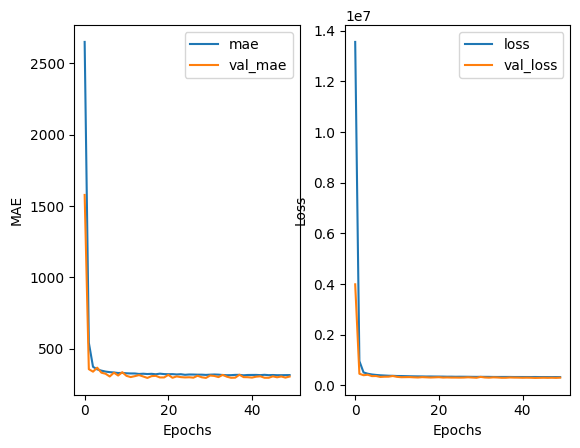

In [15]:
plt.subplot(1, 2, 1)
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(['mae', 'val_mae'])

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'])

plt.show()